In [11]:
# Dependencies
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Name of the CSV file
data = 'final_sales_data.csv'

In [13]:
#Put into data frame
data_df = pd.read_csv(data)

In [14]:
data_df.head()

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
0,Jan-2005,2005,1052224.0,1.831,5.3,181.2,138.5,138.6
1,Feb-2005,2005,1244753.0,1.910,5.4,179.8,138.6,138.4
2,Mar-2005,2005,1564938.0,2.079,5.2,176.4,138.3,138.3
3,Apr-2005,2005,1493837.0,2.243,5.2,176.9,138.3,138.4
4,May-2005,2005,1488171.0,2.161,5.1,170.7,138.7,138.8


The lower quartile of used is: 138.06074999999998
The upper quartile of used is: 148.78450000000004
The interquartile range of used is: 10.723750000000052
The median of used is: 140.7735 
The mean of used is: 142.53673469387755 
Values below 121.9751249999999 could be outliers.
Values above 164.87012500000012 could be outliers.


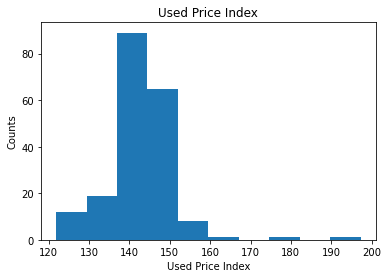

In [15]:
# Create empty list to fill 

used = data_df["Used_Auto_Price_Index"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = used.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
mean=data_df['Used_Auto_Price_Index'].mean()

print(f"The lower quartile of used is: {lowerq}")
print(f"The upper quartile of used is: {upperq}")
print(f"The interquartile range of used is: {iqr}")
print(f"The median of used is: {quartiles[0.5]} ")
print(f"The mean of used is: {mean} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    
plt.hist(data_df['Used_Auto_Price_Index'])
plt.xlabel('Used Price Index')
plt.ylabel('Counts')
plt.title('Used Price Index')
plt.savefig('Images/Used Auto Price Histogram.png', dpi=100)
plt.show()

In [16]:
used = data_df['Used_Auto_Price_Index'].tolist()

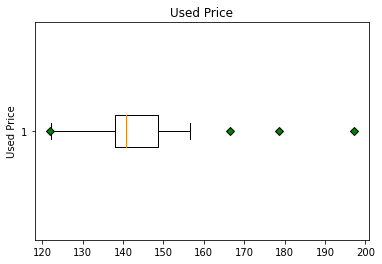

In [17]:
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Used Price')
ax1.set_ylabel('Used Price')
ax1.boxplot(used, vert=False, flierprops=green_diamond)
plt.show()

In [18]:
# Determine outliers using upper and lower bounds
quartiles1 = data_df['Used_Auto_Price_Index'].quantile([.25,.5,.75])
lowerq1 = quartiles1[0.25]
upperq1 = quartiles1[0.75]
iqr1 = upperq1-lowerq1
lower_bound1 = lowerq1 - (1.5*iqr1)
upper_bound1 = upperq1 + (1.5*iqr1)
print(f"{lower_bound1} - {upper_bound1}")
used_outliers=data_df[(data_df["Used_Auto_Price_Index"]< lower_bound1) |
                                (data_df["Used_Auto_Price_Index"]> upper_bound1)]
used_outliers

121.9751249999999 - 164.87012500000012


,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
51,Apr-2009,2009,822746.0,2.049,9.0,168.9,134.367,121.887
193,Apr-2021,2021,1493938.0,2.858,6.1,322.8,149.267,166.374
194,May-2021,2021,1502642.0,2.985,5.8,331.3,151.693,178.505
195,Jun-2021,2021,1352285.0,3.064,5.9,352.5,154.680,197.227


In [20]:
used_wo_outliers=data_df[(data_df["Used_Auto_Price_Index"]>= lower_bound1) &
                                (data_df["Used_Auto_Price_Index"]<= upper_bound1)]
used_wo_outliers

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
0,Jan-2005,2005,1052224.0,1.831,5.3,181.2,138.500,138.600
1,Feb-2005,2005,1244753.0,1.910,5.4,179.8,138.600,138.400
2,Mar-2005,2005,1564938.0,2.079,5.2,176.4,138.300,138.300
3,Apr-2005,2005,1493837.0,2.243,5.2,176.9,138.300,138.400
4,May-2005,2005,1488171.0,2.161,5.1,170.7,138.700,138.800
...,...,...,...,...,...,...,...,...
188,Nov-2020,2020,1199580.0,2.108,6.7,211.1,148.834,154.495
189,Dec-2020,2020,1597958.0,2.195,6.7,230.7,149.385,153.107
190,Jan-2021,2021,1174053.0,2.334,6.3,250.8,148.611,151.743
191,Feb-2021,2021,1256529.0,2.501,6.2,260.5,148.587,150.370


In [21]:
used_wo_outliers.describe()

,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
count,192.000000,1.920000e+02,192.000000,192.000000,192.000000,192.000000,192.000000
mean,2012.614583,1.280772e+06,2.782271,6.160938,215.151042,142.604474,142.047953
std,4.703502,2.339042e+05,0.563015,2.064455,27.377283,4.933989,6.906513
min,2005.000000,6.506080e+05,1.687000,3.500000,160.000000,132.069000,122.210000
25%,2008.750000,1.140435e+06,2.307750,4.600000,194.975000,137.700000,138.060750
50%,2013.000000,1.309942e+06,2.715500,5.300000,213.500000,145.348000,140.733000
75%,2017.000000,1.468469e+06,3.243250,7.800000,233.275000,146.797500,148.532750
max,2021.000000,1.795944e+06,4.062000,13.300000,294.400000,149.385000,156.658000


In [22]:
used_wo_outliers.to_csv("final_used_auto_data.csv",encoding="utf-8", index=False, header=True)